In [1]:
import cv2
from matplotlib import pyplot as plt

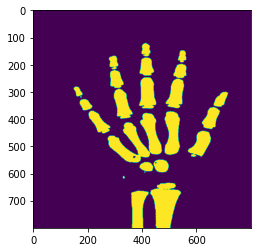

In [2]:
plt.imshow(cv2.imread('preds.png',0))

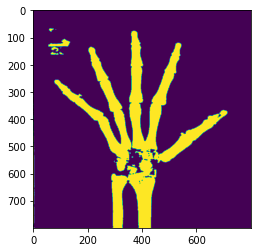

In [3]:
plt.imshow(cv2.imread('preds_val.png',0))

In [4]:
from keras.models import load_model
model = load_model('models/bone_annotation_c3.h5')

Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2022-04-10 20:01:42.058828: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-04-10 20:01:42.059100: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [5]:
model

In [6]:
from glob import glob
import cv2
test = glob('./Test/*')

test[:20]

['./Test/016_M.jpg',
 './Test/14_F.jpg',
 './Test/015_M.jpg',
 './Test/15_F.jpg',
 './Test/018_M.jpg']

In [7]:
import numpy as np
from tqdm import tqdm
from skimage.io import imread, imshow
from skimage.transform import resize

X_test = np.zeros((len(test),800,800,3), dtype= np.uint8)
sizes_test = []
for n, id_ in tqdm(enumerate(test), total = len(test)):
    img_ = cv2.imread(id_)
    img = resize(img_, (800,800), mode = 'constant', preserve_range = True)
    X_test[n] = img

print('Done')

100%|██████████| 5/5 [00:00<00:00,  5.23it/s]

Done


In [8]:
preds_test = model.predict(X_test, verbose =1)

2022-04-10 20:01:45.569653: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-04-10 20:01:45.703230: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 758ms/step


1/1 [==============================] - 0s 28ms/step


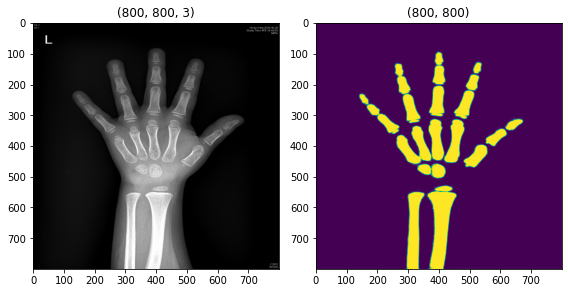

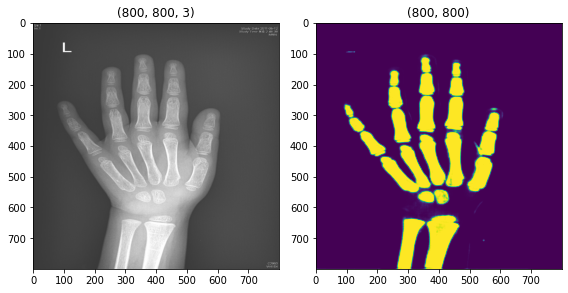

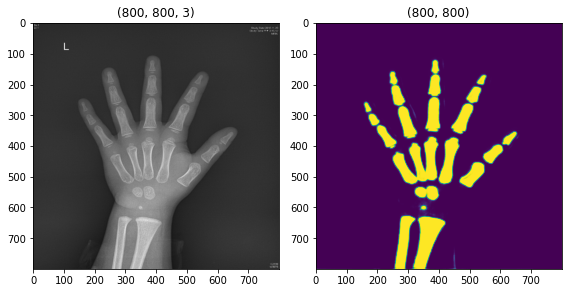

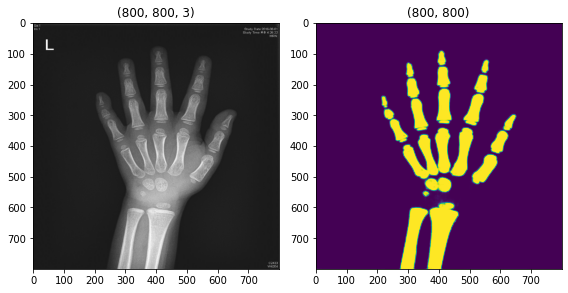

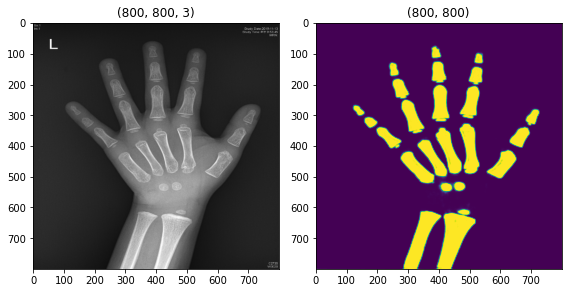

In [9]:

preds_test = model.predict(X_test, verbose =1)

for i in range(5):
    img_1 = X_test[i]
    img_2 = np.squeeze(preds_test[i])
    # img_3 = cv2.cvtColor(img_1,cv2.COLOR_BGR2GRAY)
    # img_4 = cv2.bitwise_and(img_3,img_3, mask=img_2)
    f, ax = plt.subplots(1, 2, figsize=(8,8))
    ax[0].imshow(img_1)
    ax[0].set_title(img_1.shape)
    ax[1].imshow(img_2)
    ax[1].set_title(img_2.shape)
    # ax[2].imshow(img_3)
    # ax[2].set_title(img_3.shape)
    # ax[3].imshow(img_4)
    # ax[3].set_title(img_4.shape)
    f.tight_layout()
    plt.show()

Text(0.5, 1.0, '(800, 800)')

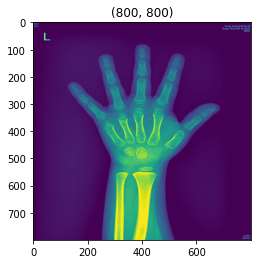

In [119]:
img_3 = cv2.cvtColor(X_test[0],cv2.COLOR_BGR2GRAY)
# img = img.astype(np.uint8)
img_3 = img_3.astype(np.uint8)
plt.imshow(img_3)
plt.title(img_3.shape)

In [10]:
img = X_test[0]
pred = preds_test[0]

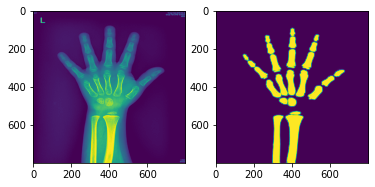

In [16]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.subplot(121)
plt.imshow(gray)
plt.subplot(122)
plt.imshow(pred)

In [22]:
import numpy as np
pred_ = pred.astype(np.uint8)

In [74]:
print(pred.shape)
print(img.shape)

(800, 800, 1)
(800, 800, 3)


In [75]:
mask = np.squeeze(pred)